<a href="https://colab.research.google.com/github/Sujangyawali/customer_segmentation/blob/main/mall_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install -q kaggle

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!pip install --upgrade --force-reinstall --no-deps kaggle
! kaggle datasets list


     |████████████████████████████████| 58 kB 3.0 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=54da5387b73d64d5eecf052fe656ac83b3c5ce2c12d8f15d9add8473536603cb
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12
ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              233KB  2021-08-27 09:22:05     

In [4]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 1.33MB/s]


In [5]:
! unzip /content/customer-segmentation-tutorial-in-python.zip

Archive:  /content/customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data=pd.read_csv('/content/Mall_Customers.csv')

In [8]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


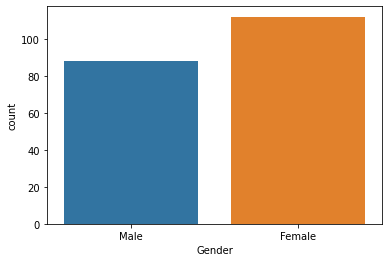

In [11]:
sns.countplot(data.Gender
              )

In [12]:
data.Gender.value_counts().index

Index(['Female', 'Male'], dtype='object')

In [13]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Of Age')

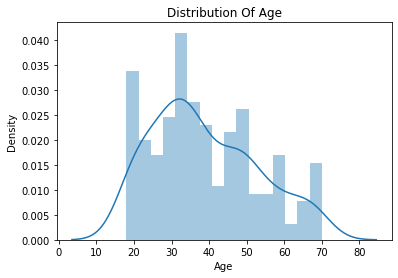

In [14]:
ax=sns.distplot(data.Age,bins=16)
ax.set_title('Distribution Of Age')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


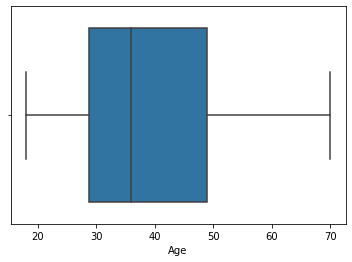

In [15]:
sns.boxplot(data.Age)

In [16]:
data.head(2
          )

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [17]:
data.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Spending Score'},inplace=True)

In [18]:
data.head()

,CustomerID,Gender,Age,Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Income')

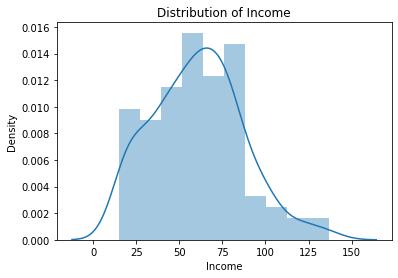

In [19]:
ax=sns.distplot(data.Income)
ax.set_title('Distribution of Income')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of Income')

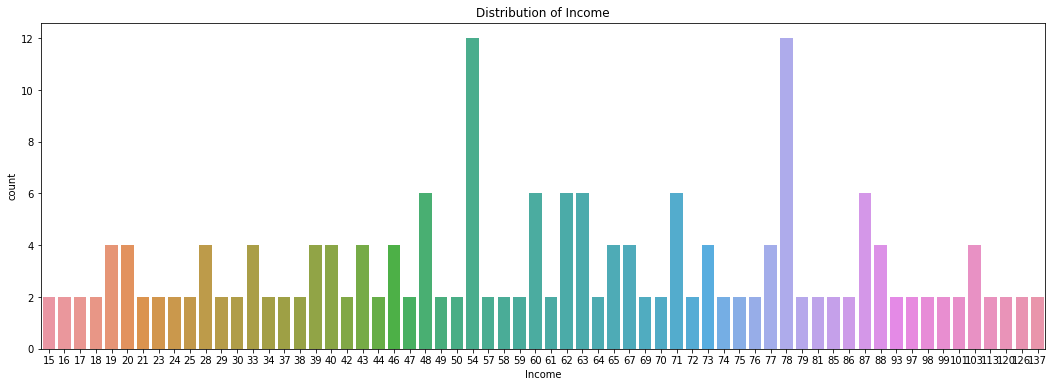

In [20]:
f,ax=plt.subplots(figsize=(18,6))
ax=sns.countplot(data.Income)
ax.set_title('Distribution of Income')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


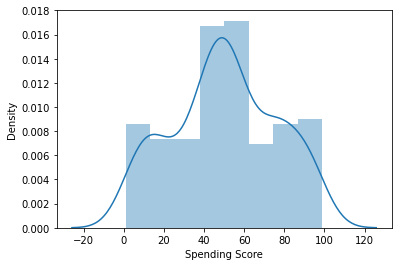

In [21]:
sns.distplot(data['Spending Score'])

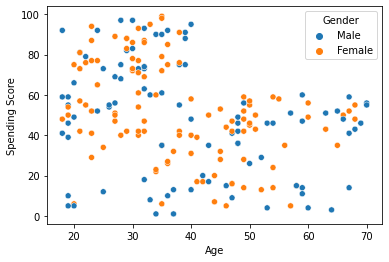

In [22]:
sns.scatterplot(x='Age',y='Spending Score',data=data,hue='Gender')

In [23]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

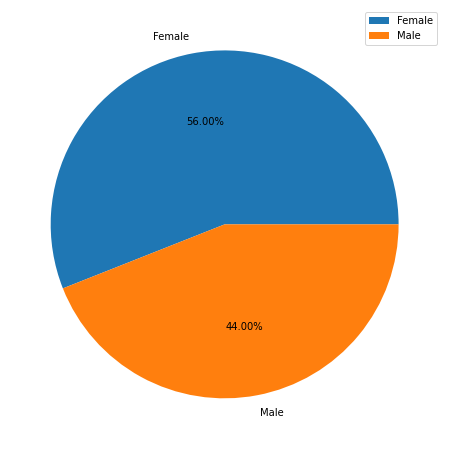

In [24]:
f,ax=plt.subplots(figsize=(12,8))
plt.pie(data['Gender'].value_counts(),labels=['Female','Male'],autopct = '%.2f%%')
plt.legend()

In [25]:
data['Gender'].nunique()

2

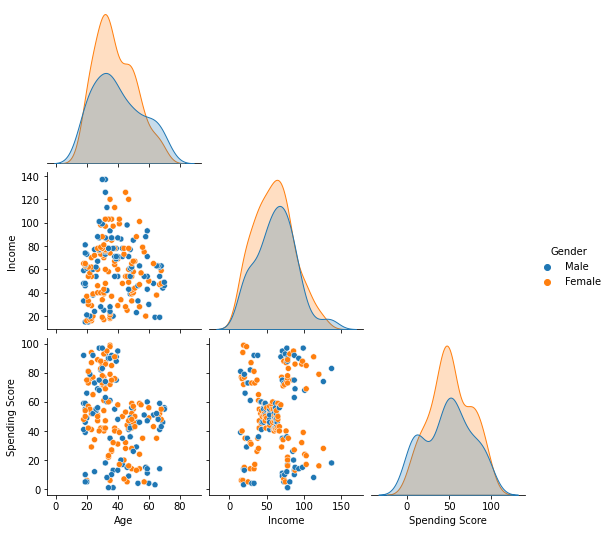

In [26]:
ax=sns.pairplot(data[['Age','Income','Spending Score','Gender']],hue='Gender',corner=True)

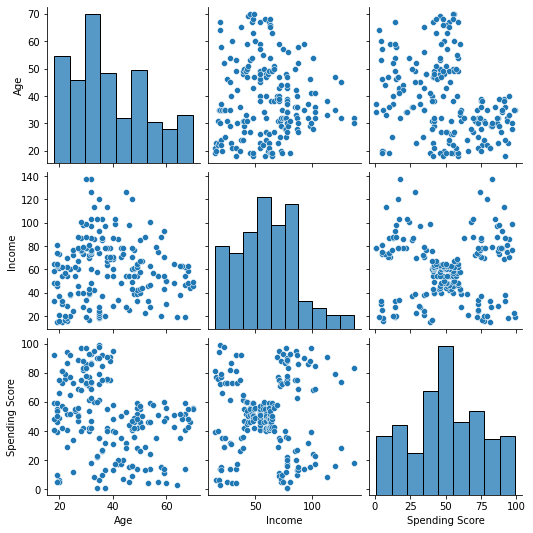

In [27]:
ax=sns.pairplot(data[['Age','Income','Spending Score','Gender']])

In [28]:
np.zeros_like(data.corr())

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [29]:
np.zeros_like(data.corr())[np.triu_indices_from(np.zeros_like(data.corr()))]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

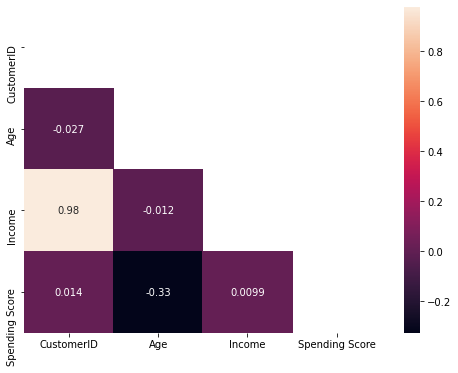

In [30]:
f,ax=plt.subplots(figsize=(8,6))
mask=np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(),annot=True,mask=mask)

In [31]:
data.head()

,CustomerID,Gender,Age,Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


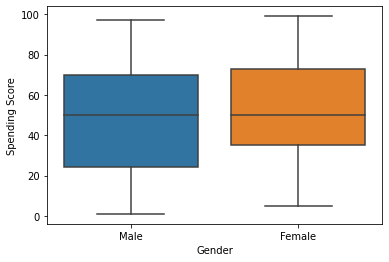

In [32]:
sns.boxplot(x='Gender',y='Spending Score',data=data)

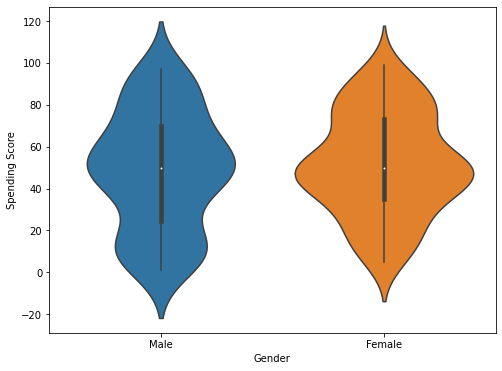

In [33]:
f,ax=plt.subplots(figsize=(8,6))
sns.violinplot(x='Gender',y='Spending Score',data=data)

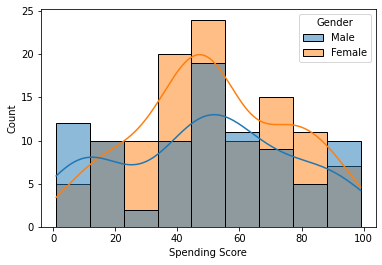

In [34]:
sns.histplot(x='Spending Score',data=data,hue='Gender',kde=True)

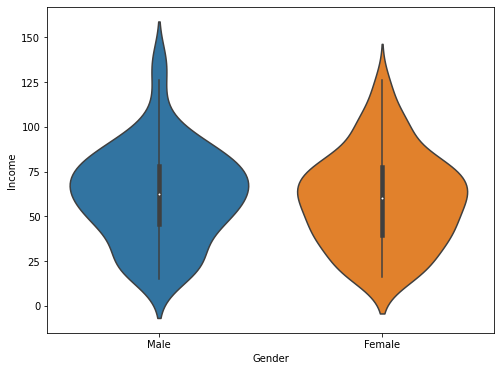

In [35]:
f,ax=plt.subplots(figsize=(8,6))
sns.violinplot(x='Gender',y='Income',data=data)

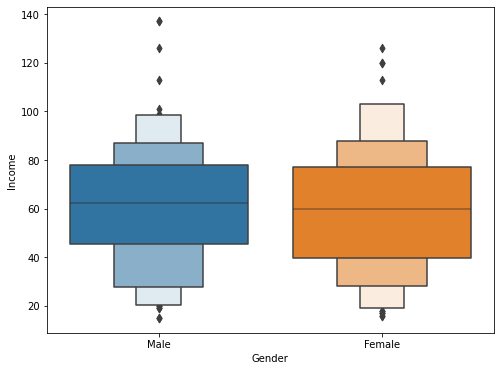

In [36]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxenplot(x='Gender',y='Income',data=data)

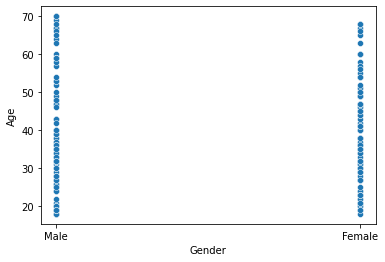

In [37]:
sns.scatterplot(x='Gender',y='Age',data=data)

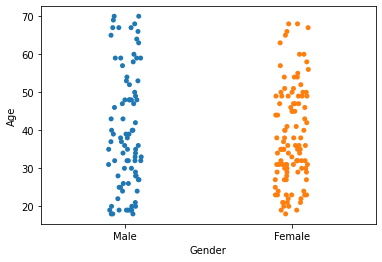

In [38]:
ax=sns.stripplot(x='Gender',y='Age',data=data)


In [39]:
data.head()

,CustomerID,Gender,Age,Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


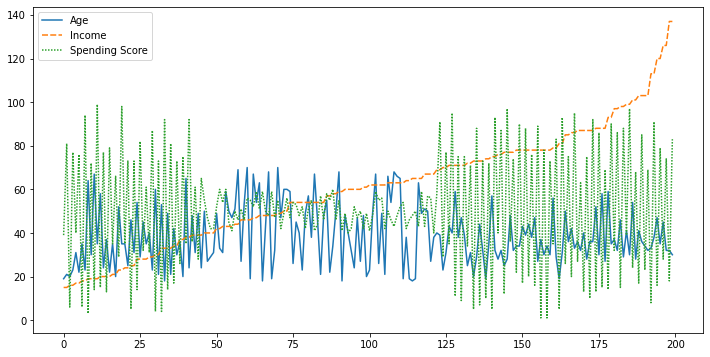

In [40]:
f,ax=plt.subplots(figsize=(12,6))
sns.lineplot(data=data.drop(columns='CustomerID'))

In [41]:
#agglomerative clustering

from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [42]:
data

,CustomerID,Gender,Age,Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [43]:
small_data=data.iloc[:10,2:]

In [44]:
small_data

,Age,Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


In [45]:
X1=small_data.values

In [46]:
X1

array([[19, 15, 39],
       [21, 15, 81],
       [20, 16,  6],
       [23, 16, 77],
       [31, 17, 40],
       [22, 17, 76],
       [35, 18,  6],
       [23, 18, 94],
       [64, 19,  3],
       [30, 19, 72]])

printing values of x
[[2], [8], [0], [4], [1], [9], [9], [0]]

 calculating values of Z
print values of Z
[[ 2.  7.  0.  2.]
 [ 5.  6.  0.  2.]
 [ 0.  4.  1.  2.]
 [ 8. 10.  1.  4.]
 [ 1.  9.  1.  3.]
 [ 3. 11.  2.  5.]
 [12. 13.  4.  8.]]

 plotting dendogram


{'color_list': ['g', 'g', 'r', 'r', 'r', 'r', 'b'],
 'dcoord': [[0.0, 0.0, 0.0, 0.0],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 1.0, 1.0, 1.0],
  [0.0, 2.0, 2.0, 1.0],
  [1.0, 4.0, 4.0, 2.0]],
 'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [35.0, 35.0, 60.0, 60.0],
  [12.5, 12.5, 47.5, 47.5]],
 'ivl': ['1', '5', '6', '3', '2', '7', '0', '4'],
 'leaves': [1, 5, 6, 3, 2, 7, 0, 4]}

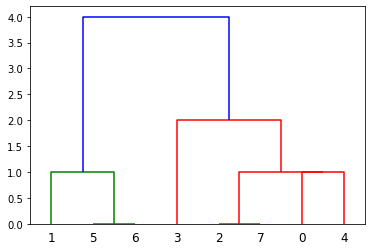

In [47]:
from scipy.cluster.hierarchy import dendrogram,linkage
from matplotlib import pyplot as plt
X = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]
print("printing values of x")
print(X)

print("\n calculating values of Z")
Z = linkage(X, 'single')
print('print values of Z')
print(Z)

print("\n plotting dendogram")
dn = dendrogram(Z)
dn

printing values of x
[[19 15 39]
 [21 15 81]
 [20 16  6]
 [23 16 77]
 [31 17 40]
 [22 17 76]
 [35 18  6]
 [23 18 94]
 [64 19  3]
 [30 19 72]]

 calculating values of Z
print values of Z
[[  3.           5.           1.73205081   2.        ]
 [  1.          10.           5.74456265   3.        ]
 [  0.           4.          12.20655562   2.        ]
 [  9.          11.          12.78671185   4.        ]
 [  2.           6.          15.13274595   2.        ]
 [  7.          13.          22.22836026   5.        ]
 [  8.          14.          42.35170205   3.        ]
 [ 12.          16.          58.13375382   5.        ]
 [ 15.          17.         138.66217941  10.        ]]

 plotting dendogram


{'color_list': ['g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'b'],
 'dcoord': [[0.0, 1.7320508075688772, 1.7320508075688772, 0.0],
  [0.0, 5.744562646538029, 5.744562646538029, 1.7320508075688772],
  [0.0, 12.786711852544421, 12.786711852544421, 5.744562646538029],
  [0.0, 22.228360263411247, 22.228360263411247, 12.786711852544421],
  [0.0, 12.206555615733702, 12.206555615733702, 0.0],
  [0.0, 15.132745950421556, 15.132745950421556, 0.0],
  [0.0, 42.351702051590166, 42.351702051590166, 15.132745950421556],
  [12.206555615733702,
   58.13375382110924,
   58.13375382110924,
   42.351702051590166],
  [22.228360263411247,
   138.66217941457575,
   138.66217941457575,
   58.13375382110924]],
 'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [60.0, 60.0, 82.5, 82.5],
  [14.375, 14.375, 71.25, 71.25]],
 'ivl': ['7', '9', '1', '3', '5', '0', '

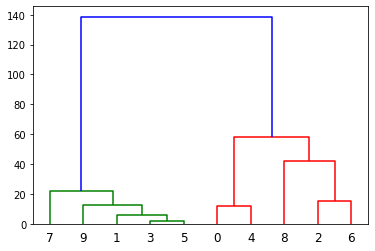

In [48]:

print("printing values of x")
print(X1)

print("\n calculating values of Z")
Z1 = linkage(X1, method='ward' )#use ward variance minimization algorithm
print('print values of Z')
print(Z1)

print("\n plotting dendogram")
dn = dendrogram(Z1)
dn

In [49]:
data.head()

,CustomerID,Gender,Age,Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [50]:
data.Gender.map({'Male':1,'Female':0})

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64

In [51]:
data.head()

,CustomerID,Gender,Age,Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [52]:
data.Gender=data.Gender.map({'Male':1,'Female':0})

In [53]:
data.head()

,CustomerID,Gender,Age,Income,Spending Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


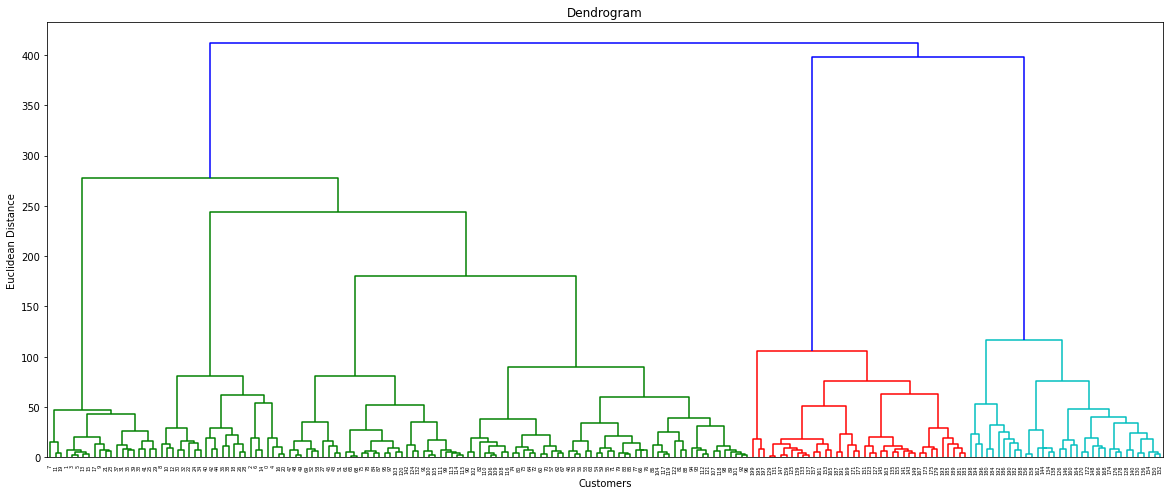

In [54]:
##########################################################################

fig,ax=plt.subplots(figsize=(20,8))
array_values = linkage(data.iloc[:,1:].values, method='ward' ,metric='euclidean')#use ward variance minimization algorithm

dn = dendrogram(array_values)
ax.set_title('Dendrogram')
ax.set_xlabel('Customers')
ax.set_ylabel('Euclidean Distance')
plt.show()

In [55]:
small_data.head(15)

,Age,Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


In [56]:
X3=small_data.values
X3

array([[19, 15, 39],
       [21, 15, 81],
       [20, 16,  6],
       [23, 16, 77],
       [31, 17, 40],
       [22, 17, 76],
       [35, 18,  6],
       [23, 18, 94],
       [64, 19,  3],
       [30, 19, 72]])

In [57]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X3)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [58]:
kmeans.cluster_centers_  ,kmeans.inertia_ ,kmeans.labels_ 

(array([[23.8, 17. , 80. ],
        [33.8, 17. , 18.8]]),
 3122.4000000000005,
 array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0], dtype=int32))

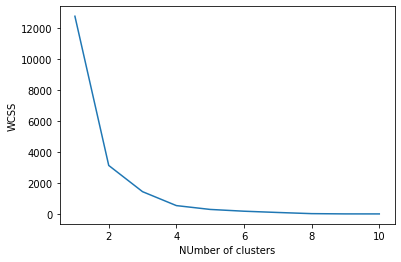

In [59]:
import matplotlib.pyplot as plt

wcss=[]
for i in range(1,11):
  kmeans_for = KMeans(n_clusters=i, random_state=0).fit(X3)
  wcss.append(kmeans_for.inertia_)

plt.plot(range(1,11),wcss)
plt.xlabel('NUmber of clusters')
plt.ylabel('WCSS')
plt.show()



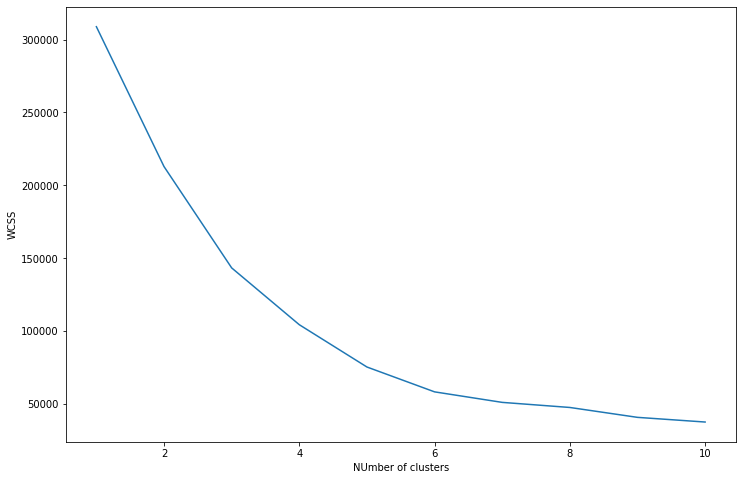

In [60]:
#############################
#######################################
#############################################

f,ax=plt.subplots(figsize=(12,8))
wcss=[]
for i in range(1,11):
  kmeans_for = KMeans(n_clusters=i, random_state=0).fit(data.iloc[:,1:].values)
  wcss.append(kmeans_for.inertia_)

plt.plot(range(1,11),wcss)
plt.xlabel('NUmber of clusters')
plt.ylabel('WCSS')
plt.show()



In [61]:
from sklearn.metrics import  silhouette_score
from sklearn.metrics import  silhouette_samples

X4=[[1,1],[2,3],[8,9],[9,9]]
print(X4)
k_means=KMeans(n_clusters=2,max_iter=50)
k_means.fit(X4)
cluster_labels=k_means.predict(X4)
print(cluster_labels)

#Calculate the average of silhouette scores
silhouette_avg = silhouette_score(X4,cluster_labels)
print(silhouette_avg)

#Calculate the silhouette score for each data
each_silhouette_score = silhouette_samples(X4,cluster_labels,metric="euclidean")
print(each_silhouette_score)


[[1, 1], [2, 3], [8, 9], [9, 9]]
[0 0 1 1]
0.8353940726006672
[0.79620098 0.74740582 0.89537247 0.90259702]


In [62]:
#####################################################
######################################################
for i in range(2,10):
  K_mean=KMeans(n_clusters=i)
  fitted_kmean=K_mean.fit(data.iloc[:,1:].values)
  predict_label=fitted_kmean.predict(data.iloc[:,1:].values)
  avg_sh_coef=silhouette_score(data.iloc[:,1:].values,predict_label)
  print (f"For {i} cluster silhouette coefficient {avg_sh_coef}")

For 2 cluster silhouette coefficient 0.29307334005502633
For 3 cluster silhouette coefficient 0.383798873822341
For 4 cluster silhouette coefficient 0.4052954330641215
For 5 cluster silhouette coefficient 0.44482259384548795
For 6 cluster silhouette coefficient 0.45206493204632353
For 7 cluster silhouette coefficient 0.43946743327036053
For 8 cluster silhouette coefficient 0.4275788369618678
For 9 cluster silhouette coefficient 0.4160060731093897


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fe63f293410>,
                     model=None)

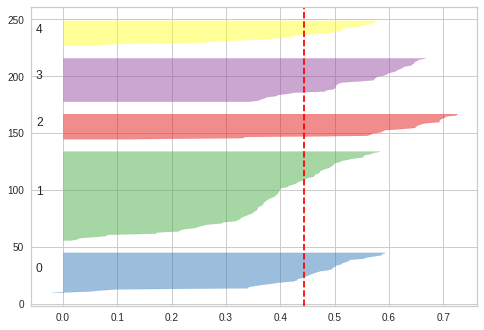

In [63]:
#####################################################
###################################################
from  yellowbrick.cluster import SilhouetteVisualizer
# Instantiate the clustering model and visualizer

model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(data.iloc[:,1:].values)
#red dotted lines gives average silhouette coefficient for that  number of cluster

In [64]:
data.iloc[:,1:].columns

Index(['Gender', 'Age', 'Income', 'Spending Score'], dtype='object')

In [65]:
###################################################################

#centroid of cluster
cols=data.iloc[:,1:].columns
df=pd.DataFrame(fitted_kmean.cluster_centers_,columns=cols)
df

,Gender,Age,Income,Spending Score
0,0.409091,25.272727,25.727273,79.363636
1,0.300000,41.000000,109.700000,22.000000
2,0.482759,32.862069,78.551724,82.172414
3,0.431818,56.340909,53.704545,49.386364
4,0.357143,37.428571,25.714286,26.642857
5,0.400000,32.200000,109.700000,82.000000
6,0.351351,27.108108,56.297297,49.675676
7,0.653846,41.230769,79.269231,15.923077
8,0.500000,56.375000,25.875000,9.125000


In [66]:
#DBSCAN

In [67]:
from sklearn.cluster import DBSCAN 
X5=[[1, 2], [2, 2], [2, 3],[8, 7], [8, 8], [4, 11],[3,11],[20,90]]
#print(X5)

X6=np.array(X5)
#print(X6)

clustering=DBSCAN(eps=2,min_samples=2).fit(X6)
#print(clustering)


label=clustering.labels_
#print(label)

#outlier lai remove garera bacheko instances matra return grxa
clustering.components_

clustering.core_sample_indices_#index dinxa


len(set(label))#set ma rekhepaxi array ko unique value dinxa

number_of_cluster=n_clusters=len(set(label))- (1 if -1 in label else 0)
print(f"Number  of cluster determined {number_of_cluster}")



#find number of outliers
number_of_outlier_detected=X6.shape[0]-clustering.components_.shape[0]
print(f"number of Outlier detected {number_of_outlier_detected}")

Number  of cluster determined 3
number of Outlier detected 1


In [82]:
########################################################
########################################################


from sklearn.cluster import DBSCAN 

clustering=DBSCAN(eps=4,min_samples=3).fit(data.iloc[:,1:].values)
#print(clustering)


label_2=clustering.labels_
#print(label)

#outlier lai remove garera bacheko instances matra return grxa
clustering.components_

clustering.core_sample_indices_#index dinxa


len(set(label))#set ma rekhepaxi array ko unique value dinxa

number_of_cluster=n_clusters=len(set(label))- (1 if -1 in label else 0)
print(f"Number  of cluster determined {number_of_cluster}")



#find number of outliers
number_of_outlier_detected=X6.shape[0]-clustering.components_.shape[0]
print(f"number of Outlier detected {number_of_outlier_detected}")

Number  of cluster determined 3
number of Outlier detected -2


In [69]:
np.arange(1,10,2)

array([1, 3, 5, 7, 9])

In [70]:

eps_values = np.arange(6,12)
eps_values

array([ 6,  7,  8,  9, 10, 11])

In [71]:
min_samples = np.arange(3,10)
min_samples

array([3, 4, 5, 6, 7, 8, 9])

In [72]:
#***********************************
#Determining best value for epsilon,and min point


from itertools import product

a=np.arange(3,5)
print(f"\n value of a {a}")
b=np.arange(6,8)
print(f"\n value of b {b}")
DBSCAN_params=list(product(a, b))
print(f"DBSCAN_params {DBSCAN_params}")



 value of a [3 4]

 value of b [6 7]
DBSCAN_params [(3, 6), (3, 7), (4, 6), (4, 7)]


In [73]:


small_data2_array=data.iloc[:,1:].values
#small_data2_array

In [74]:
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [75]:
no_of_clusters = []
sil_score = []


for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(small_data2_array)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(small_data2_array, DBS_clustering.labels_))

In [76]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
#tmp

In [77]:
tmp['No_of_clusters'] = no_of_clusters
tmp

,Eps,Min_samples,No_of_clusters
0,8.0,3,17
1,8.0,4,10
2,8.0,5,7
3,8.0,6,8
4,8.0,7,6
...,...,...,...
128,12.5,5,5
129,12.5,6,5
130,12.5,7,4
131,12.5,8,4


In [78]:
pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

Eps,8.00,8.25,8.50,8.75,9.00,9.25,9.50,9.75,10.00,10.25,10.50,10.75,11.00,11.25,11.50,11.75,12.00,12.25,12.50
Min_samples,,,,,,,,,,,,,,,,,,,
3,17,16,13,12,12,13,11,11,11,11,11,12,10,8,8,7,7,6,4
4,10,10,10,8,8,8,7,7,7,7,7,7,7,7,7,7,7,6,6
5,7,8,8,6,6,6,6,6,5,6,6,6,6,6,7,6,6,5,5
6,8,8,8,7,7,7,5,4,4,5,5,5,5,5,5,5,4,4,5
7,6,7,7,6,6,7,6,6,6,5,6,6,6,6,5,5,5,5,4
8,5,5,6,6,6,7,5,5,5,5,5,5,5,4,5,5,5,5,4
9,4,4,4,4,5,7,6,6,6,6,5,5,5,5,4,5,5,5,5


In [79]:
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

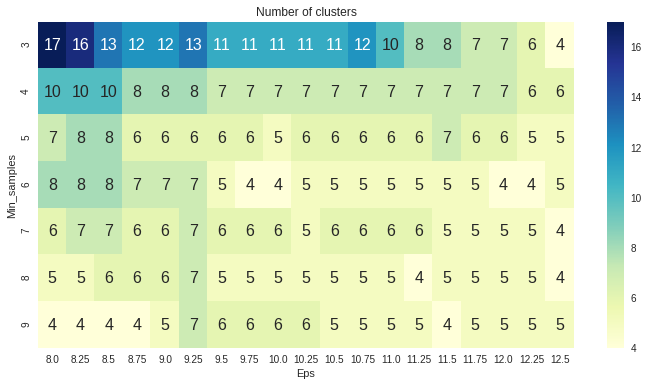

In [80]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16},cmap="YlGnBu", ax=ax)
#,annot_kws={"size": 16} #annotation vitra vayako value 17 ko size badaune ghataune
ax.set_title('Number of clusters')
plt.show()

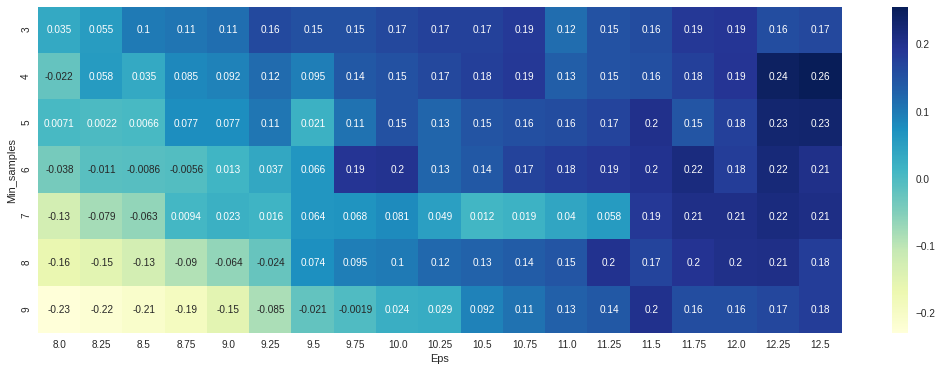

In [81]:
tmp2 = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp2['Sil_score'] = sil_score

pivot_2 = pd.pivot_table(tmp2, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [86]:
numeric_data=data.iloc[:,1:]
# numeric_data.head()


DBS_clustering=DBSCAN(eps=12.5,min_samples=4).fit(numeric_data)


In [87]:
DBS_clustering

DBSCAN(algorithm='auto', eps=12.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [88]:
DBSCAN_clustered= numeric_data.copy()
DBSCAN_clustered

,Gender,Age,Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [89]:
DBSCAN_clustered.loc[:,'Cluster']=DBS_clustering.labels_
DBSCAN_clustered

,Gender,Age,Income,Spending Score,Cluster
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,-1
3,0,23,16,77,0
4,0,31,17,40,0
...,...,...,...,...,...
195,0,35,120,79,-1
196,0,45,126,28,-1
197,1,32,126,74,-1
198,1,32,137,18,-1


In [95]:
DBSCAN_clustered.groupby('Cluster').size()

Cluster
-1     18
 0    112
 1      8
 2     34
 3     24
 4      4
dtype: int64

In [103]:
DBSCAN_cluster_size=DBSCAN_clustered.groupby('Cluster').size().to_frame()

In [104]:
DBSCAN_cluster_size.columns=['DBSCAN_size']

In [105]:
DBSCAN_cluster_size

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


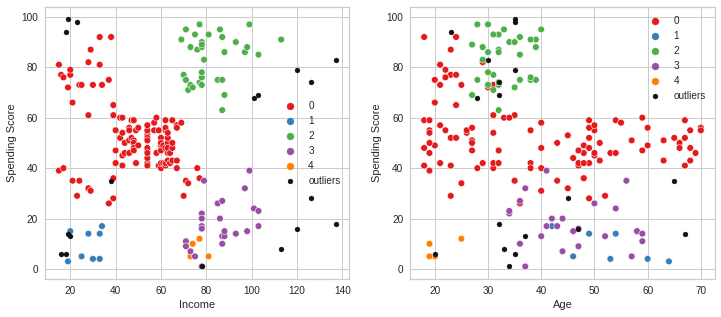

In [111]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot('Income', 'Spending Score',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot('Age', 'Spending Score',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Income'], outliers['Spending Score'], s=25, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score'], s=25, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

In [101]:
#to frame
s = pd.Series(["a", "b", "c"])
s
s.to_frame()

,0
0,a
1,b
2,c
